In [1]:
import numpy as np

perch_length = np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0,
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5,
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5,
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0,
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0,
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
     )
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0,
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0,
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0,
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0,
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0,
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0,
     1000.0, 1000.0]
     )

In [2]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(perch_length, perch_weight)

In [4]:
train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)
print(train_input.shape, test_input.shape)

(42, 1) (14, 1)


In [5]:
from sklearn.neighbors import KNeighborsRegressor
knr = KNeighborsRegressor(n_neighbors=3) # 최근접 이웃의 갯수 기본값 5가 아닌 3으로 변경 - 모델의 복잡도가 높아진다!

knr.fit(train_input, train_target)

KNeighborsRegressor(n_neighbors=3)

In [7]:
knr.predict([[50], [100]])

array([1066.66666667, 1066.66666667])

In [16]:
distances, indexes = knr.kneighbors([[50]])

# 넘파이 평균 mean
np.mean(train_target[indexes])

1066.6666666666667

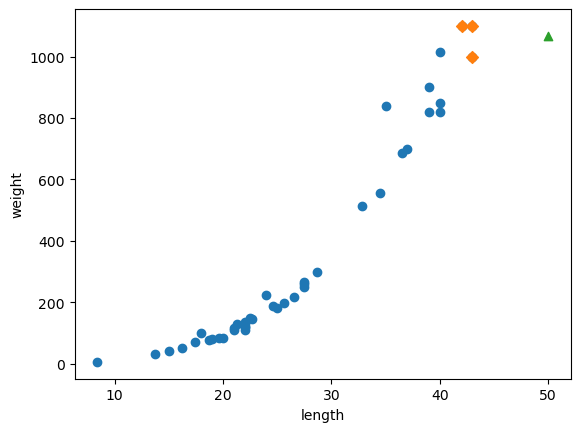

In [17]:
import matplotlib.pyplot as plt

plt.scatter(train_input, train_target)
plt.scatter(train_input[indexes], train_target[indexes], marker='D') # 50cm 길이의 농어 최근접 이웃 
plt.scatter(50, 1066, marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [18]:
# 선형 회귀

from sklearn.linear_model import LinearRegression

lr = LinearRegression()

# 훈련
lr.fit(train_input, train_target)

# 예측 - 50cm 농어 무게
lr.predict([[50]])


array([1210.91241136])

In [19]:
# 최적의 기울기 - 계수, 가중치  - lr.coef_ 
# 최적의 절편 - lr.intercept_ 

print(lr.coef_, lr.intercept_)   # y = 36.8x - 630.96  : x - 길이, y - 무게 

[36.8375525] -630.9652133904167


[-336.26479343032054, 1841.877624750601, -630.9652133904167]


ValueError: x and y must have same first dimension, but have shapes (2,) and (3,)

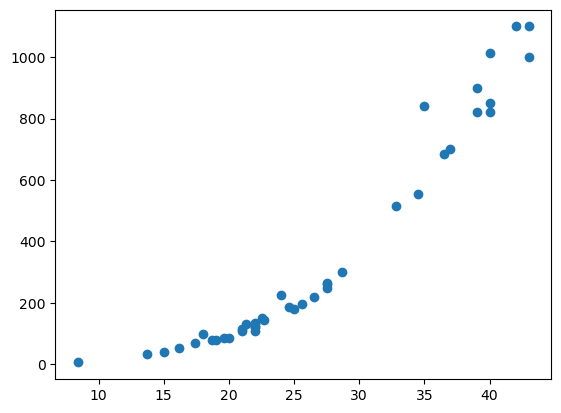

In [22]:
# matplotlib  - plot :  직선, 곡선 그래프

plt.scatter(train_input, train_target) # 훈련 세트 
plt.plot([8, 50], [8 * lr.coef_[0] + lr.intercept_, 50 * lr.coef_[0] + lr.intercept_])
plt.scatter(50, 1210, marker='^')
plt.xlabel("length")
plt.ylabel("weight")
plt.show()